# Calculer les seuils de rentabilité.

## Introduction

La formule de seuil de rentabilité permet de savoir au bout de combien d'unités vendues on va obtenir un bénéfice, sachant nos prix de vente, nos côuts fixes et nos coûts variables. 

Il s'agit d'un seuil, c'est à dire  qu'en dessous, notre entreprise <b>perds de l'argent</b>, et au dessus, notre entreprise <b> gagne de l'argent</b>. C'est donc un prérequis de base impératif à connaitre.

<div style="text-align:center">
<img src="img/rentabilite.jpg">
</div>


En Anglais, le seuil de rentabilité se dit " Even Breakpoint", le mot Breakpoint est bien représentatif de la notion de seuil.

<b>Source : Bernard W Taylor "Introduction to Management Science 11th 2013" </b>

Ces calculs sont tirés de l'excellent livre de Bernard W Taylor sous Excel, les résultats sont identiques.

Transformé en Python par Github estellederrien.

## Sommaire

1. <b>Calculer le seuil de rentabilité linéaire d'un seul produit</b>
    - a. Notre exemple de base
    - b. Les formules
    - c. Calcul avec Python
    - d. Visualisation graphique de nos profits et de notre seuil de rentabilité
2. <b>Calculer le seuil de rentabilité non linéaire d'un seul produit</b>
    - a. Description
    - b. Les formules
    - c. Calcul avec Python
    - d. Etablir le prix idéal de notre t shirt et le volume de vente.
    - e. Etablir notre profit et notre prix idéal de vente avec l'optimisation de Scipy
3. <b>Calculer le seuil de rentabilité linéaire de plusieurs produits</b>
    - a. Notre exemple de base
    - b. Les formules
    - c. Calcul avec Python
4. <b>Calculer le seuil de rentabilité vis à vis du chiffre d'affaire</b>
    - a. Notre exemple de base
    - b. Les formules
    - c. Calcul avec Python

# 1. Calculer le seuil de rentabilité linéaire

## a. Notre exemple de base

- L'usine x a un coût fixe de 10 000 euros 
- Chaque t shirt produit a un coût variable de 8 euros
- Elle les vends 23 euros l'unité.

A partir de combien de t shirt vendus l'entreprise va-t-elle faire un bénéfice ?

## b. Les formules 

<b>Formule de calcul des couts :</b> 

- Coût total = total des coûts fixes + total des coûts variables
- cout variables = cout par jean
- cout fixe = cout total de l'usine

<b>Formule de calcul du profit :</b> 
- total profit = revenu total  - cout total
- Z = v * p - cf - v * cv

oû

- v =  volume de vente (i.e., demand) 
- p = prix fixe
- cf = cout fixe
- cv = cout variable

<b>Formule du seuil de rentabilité :</b> 

- seuil de rentabilité = couts fixes / (prix - cout variable)



## c. Calcul avec python

In [76]:
# nos datas
couts_fixes = 10000
prix_unitaire = 23
cout_variable = 8
ventes = 1000

# Notre Profit si on vends 1000 t shirts:
# P = v * p - cf - v * cv
profit = ventes * prix_unitaire - couts_fixes - ventes * cout_variable

print (" Notre profit pour 1000 t shirts vendus sera de : ", profit," euros")


#Formule du seuil de rentabilité : 
seuil_de_rentabilité = couts_fixes / (prix_unitaire - cout_variable)

print("L'entreprise sera rentable à partir de :", seuil_de_rentabilité, "t shirts produits")


 Notre profit pour 1000 t shirts vendus sera de :  5000
L'entreprise sera rentable à partir de : 666.6666666666666 t shirts produits


## Visualisation graphique de nos profits et de notre seuil de rentabilité

On voit à l'aide du graphique notre seuil de rentabilité à 667 unités vendues, et le profit qui monte ensuite linéairement.
Ca veut dire que si on se lance dans la production de ce t shirt, il faut absolument en vendre plus de 667 pour gagner de l'argent !

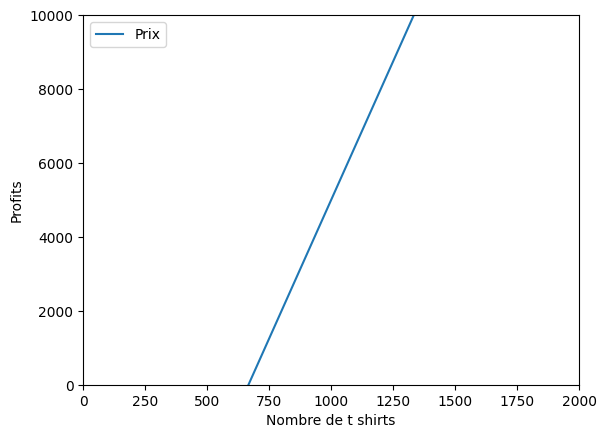

In [77]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
p_cords = range(2000)

# On définit les fonctions.
prix_objet_A = [p * 23 - 10000 - p * 8  for p in p_cords] 

# On trace
plt.plot(p_cords,prix_objet_A, label="Prix")

plt.xlabel("Nombre de t shirts")
plt.ylabel("Profits")
plt.xlim(0,2000)
plt.ylim(0,10000)
plt.legend(loc="upper left")
plt.show()

# 2. Calculer le seuil de rentabilité non linéaire

## a. Description

Le modèle linéaire est un peu simpliste et ne décrit pas l'attitude réelle des consommateurs, on préfére pour cela utiliser l'équation linéaire de la demande pour décrire l'attitude du consommateur, et l'inclure dans nos formules élaboreés précédemment.

<b>Citation de Bernard W Taylor :</b>
Raison de passer en non linéaire : 
Une hypothèse importante mais quelque peu irréaliste de ce modèle de rentabilité est que le volume, ou demande, est indépendante du prix (c'est-à-dire que le volume reste constant, quel que soit le prix de produit). 
Il serait plus réaliste que la demande varie à mesure que le prix augmente ou diminue. pour notre exemple de base.


Supposons que la dépendance de la demande sur le prix est définie par la fonction linéaire suivante:
v = 1,500 - 24.6p
Ca veut dire que si le prix dépasse 60.98 euros alors il n'y a plus de demande du tout.

## On trace cette équation de la demande

On voit que la demande décroit en fonction du prix, et qu'en dessous de 60, 98 euros, elle devient négative. La réaction des acheteurs potentiels est quantifiée mathématiquement parlant.

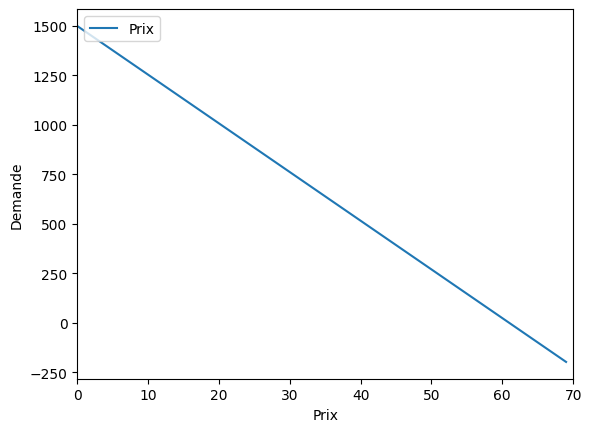

In [78]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
p_cords = range(70)

# On définit les fonctions.
prix_lineaires_objet_A = [1500 - 24.6 * p   for p in p_cords] 

# On trace
plt.plot(p_cords,prix_lineaires_objet_A, label="Prix")

plt.xlabel("Prix")
plt.ylabel("Demande")
plt.xlim(0,70)
plt.legend(loc="upper left")
plt.show()

## c. Calcul avec python

Maintenant, le volume de vente n'est plus un nombre discret de 1000, mais on le substitue dans notre formule du profit par l'équation linéaire de la demande spécifiée précédemment.

Cela provoque une élevation au carré du prix unitaire, ce qui nous fait entrer dans le monde du "non linéaire".

In [79]:
# On calcule le seuil de rentabilité

couts_fixes = 10000
prix_unitaire = 23
cout_variable = 8
ventes = 1500 - 24.6 * prix_unitaire # Remarquer que ce n'est plus un nombre discret, mais une équation !

# notre Profit si on vends 1000 t shirts:
# P = v * p - cf - v * cv
profit = ventes * prix_unitaire - couts_fixes - ventes * cout_variable
print (" Notre profit pour 1000 t shirts vendus sera de : ", profit)


 Notre profit pour 1000 t shirts vendus sera de :  4012.999999999999


# On trace notre courbe de profits

On entre l'équation de profit qui résulte de l'inclusion de notre équation de la demande, et on trace notre graphique prévisionnel .

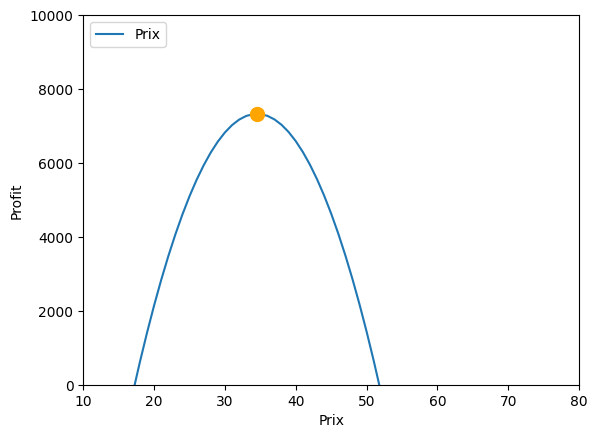

In [80]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
p_cords = range(70)

# On définit les fonctions.
prix_objet_A = [1698.8 * p - 24.6 * p ** 2 - 22000  for p in p_cords] 

# On trace
plt.plot(p_cords,prix_objet_A, label="Prix")

plt.xlabel("Prix")
plt.ylabel("Profit")
plt.xlim(10,80)
plt.ylim(0,10000)
plt.legend(loc="upper left")
plt.plot(34.52,7328,'o',markersize=10,color='orange')
plt.show()



# d. Etablir notre prix idéal et notre volume de vente.

Et bien, il nous reste maintenant à établir notre seuil de rentabilité non linéaire, basé sur cette équation linéaire de la demande fournie par le service commercial.

Si l'on regarde notre courbe de profit, le seuil de rentabilité est la valeur ou la pente de la courbe est à zéro.

(Le pente = à zéro est la ou la dérivée de la courbe est = à 0 car la dérivée est une mesure de la pente de la courbe.)

Pour le calculer, il faut calculer la dérivée , puis trouver la valeur pour le plus haut point ou la pente est = à zéro .

La dérivée de la fonction profit est :

- fonction profit = 1696.8 - 24.6 * p² - 22 000
- dérivée = 1696.8 - 49.2 * p
- dérivée en 0 = 1696.8 - 49.2 * p

Note :  Les résultats sont les mêmes que ceux du livre.

In [81]:
# La dérivée en zéro qui nous donne le prix idéal
prix_ideal = 1696.8 / 49.2 
print("Prix idéal d'un t shirt: " , prix_ideal, "euros")


# Le volume de t shirt a produire est calculé en substituant le prix idéal 
# dans l'équation' linéaire donnée eu début
# v  = 1500 - 24.6  * (34,49)
v = 1500 - 24.6  * 34.49
print("Volume de t shirts à produire : " , v)

prix ideal :  34.48780487804878 euros
Volume à produire :  651.5459999999999


# e. Etablir notre profit et notre prix idéal de vente avec l'optimisation de Scipy

Plutot que de prendre la dérivée comme dans l'exemple précédent, on va utiliser scipy optimize pour calculer le point le plus haut de notre courbe, pour cela on minimise la négative de notre équation, parce que scipy optimize n'a pas d'option de maximisation. Cela revient au même.

In [82]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return - (1698.8 * x - 24.6 * x ** 2 - 22000)
res = minimize_scalar(objective_function)

# On voit que la fonction atteinds un maximum en 34.52 avec un profit de 7328
print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -7328.469918699189
       x: 34.52845528455206
     nit: 4
    nfev: 9


# 3. Calculer le seuil de rentabilité linéaire de plusieurs produits

## Description

Imaginons que notre entreprise vende 5 t shirts de gamme différentes, certains pourraient être rentables, d'autres non. Au final, les bénéfices sont peut être tout de même bons et la société rentable.

On va essayer de trouver les calculs pour observer tout ça.